In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
target_dir = "./results"

In [ ]:
target_fivequbit = "./results/transformer-fivequbit-onlygood/transformer_fivequbit_code_only_good_examples_results.csv"
target_steane = "./results/transformer-steane-code-onlygood/transformer_steane_code_only_good_examples_results.csv"
target_toric_code = "./results/transformer-toric-code-onlygood/transformer_toric_code_only_good_examples_results.csv"

df_fivequbit = pd.read_csv(target_fivequbit)
df_steane = pd.read_csv(target_steane)
df_toric_code = pd.read_csv(target_toric_code)


In [7]:
hyper_columns = ['lr', 'dropout', 'd_model', 'num_encoder_layers', 'num_decoder_layers', 'nhead', 'dim_feedforward']
df_fivequbit.head()

,job_id,epoch,train_loss,train_acc,val_loss,val_acc,vs_lookup,vs_minweight,lr,d_model,...,num_encoder_layers,num_decoder_layers,nhead,dim_feedforward,beta,var,job_id.1,total_parameters,total_time,total_epochs
0,0,70,0.016940,1.0,0.013885,1.0,0.0,0.0,0.0040,8,...,1,1,2,8,1,0.01,0,1314,672.709366,1999
1,1,250,0.022551,1.0,0.025874,1.0,0.0,0.0,0.0005,12,...,1,1,4,4,1,0.01,1,2338,707.009050,1999
2,2,140,0.000890,1.0,0.000871,1.0,0.0,0.0,0.0040,16,...,2,1,4,4,1,0.01,2,5182,877.456567,1999
3,3,270,0.066094,1.0,0.066600,1.0,0.0,0.0,0.0001,8,...,2,1,4,8,1,0.01,3,1778,800.908828,1999
4,4,100,0.007630,1.0,0.004621,1.0,0.0,0.0,0.0050,16,...,3,1,4,8,1,0.01,4,7010,1028.768397,1999


 - toric-code: lr >= 0.001 only.
 - all: decoder_layers=1
 

In [33]:
def plot_hyperparam_bars(df):
    for hyper in hyper_columns:
        unique_vals = sorted(df[hyper].dropna().unique())
        total_counts = []
        acc1_counts = []
        for val in unique_vals:     
            df_hyper = df[df[hyper] == val]
            df_hyper_train_acc = df_hyper[np.abs(df_hyper['train_acc'] - 1) <= 0.001]
            
            total_counts.append(len(df_hyper))
            acc1_counts.append(len(df_hyper_train_acc))
        print(hyper)
        print(total_counts)
        print(acc1_counts)
        x = np.arange(len(unique_vals))
        width = 0.35

        fig, ax = plt.subplots()
        ax.bar(x, total_counts, width, color='red', alpha=0.7, label='Total')
        ax.bar(x, acc1_counts, width, color='blue', alpha=0.7, label='train_acc == 1')

        ax.set_xlabel(hyper)
        ax.set_ylabel('Count')
        ax.set_title(f'Counts for {hyper}')
        ax.set_xticks(x)
        ax.set_xticklabels([str(val) for val in unique_vals], rotation=45)
        ax.legend()
        plt.tight_layout()
        plt.show()


lr
[26, 28, 29, 13, 14, 19, 20, 19, 32]
[26, 28, 29, 13, 14, 19, 20, 19, 29]


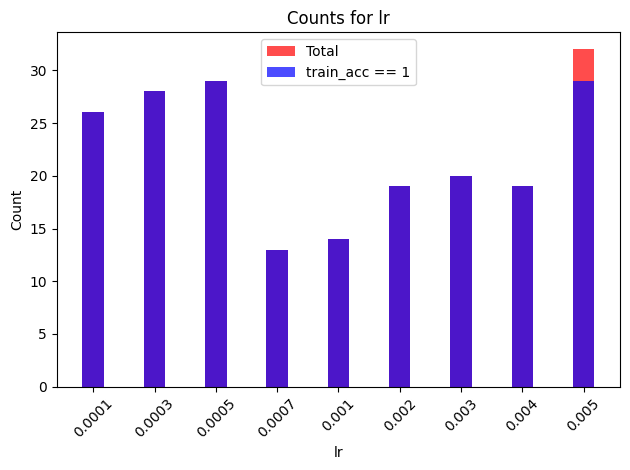

dropout
[58, 70, 72]
[58, 68, 71]


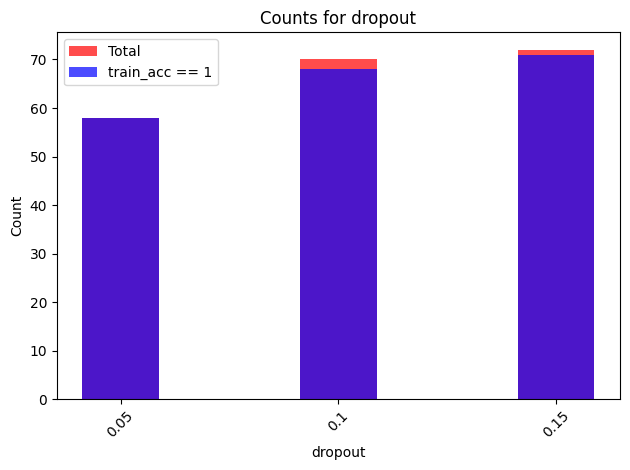

d_model
[75, 53, 72]
[74, 53, 70]


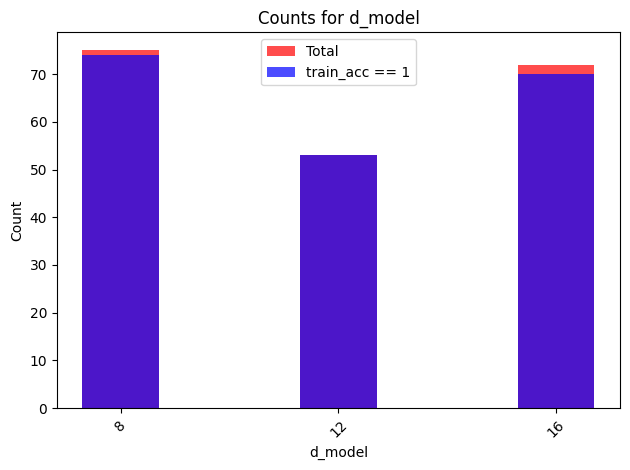

num_encoder_layers
[70, 69, 61]
[69, 69, 59]


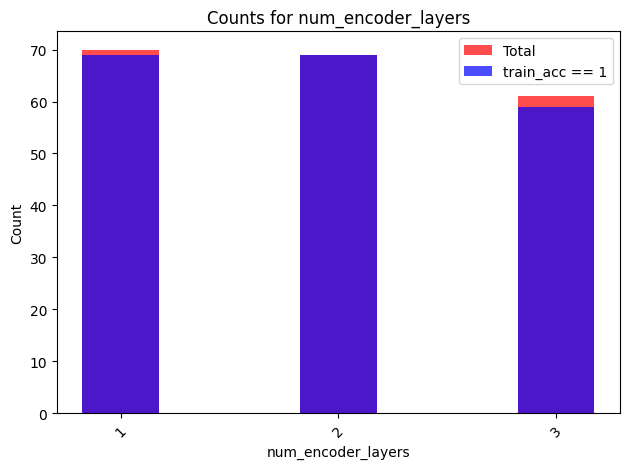

num_decoder_layers
[200]
[197]


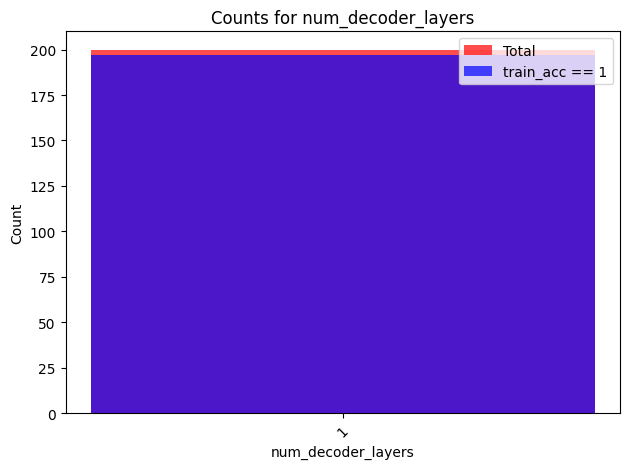

nhead
[111, 89]
[108, 89]


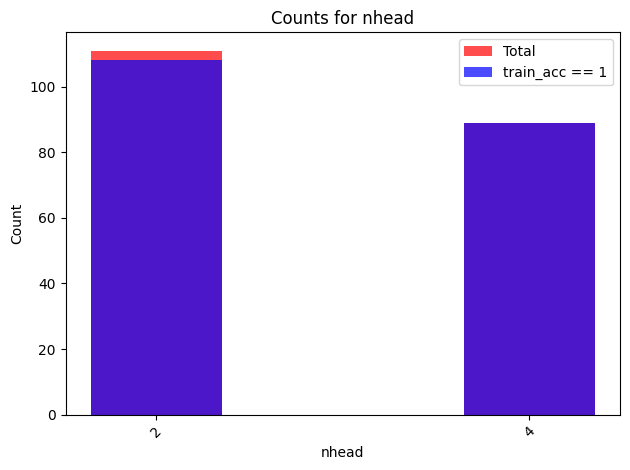

dim_feedforward
[65, 69, 66]
[64, 68, 65]


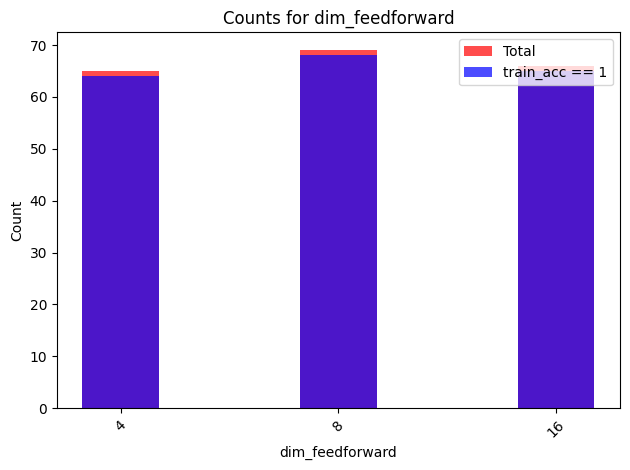

In [34]:
df_fivequbit_trimmed = df_fivequbit[df_fivequbit['num_decoder_layers'] == 1]
plot_hyperparam_bars(df_fivequbit_trimmed)


112
52
lr
[8, 16, 17, 15, 16, 8, 8, 13, 11]
[7, 16, 17, 15, 16, 8, 8, 13, 11]


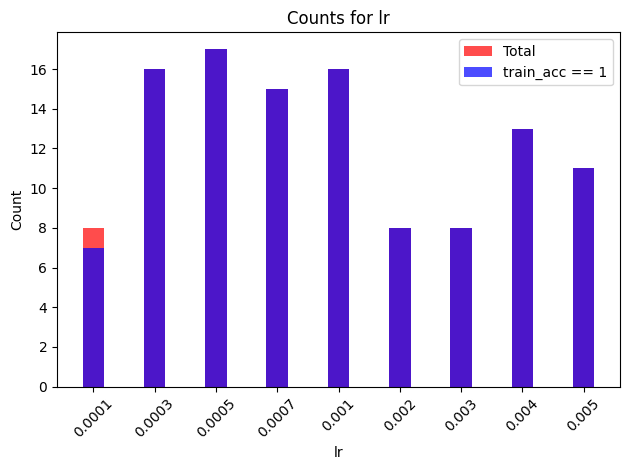

dropout
[55, 57]
[54, 57]


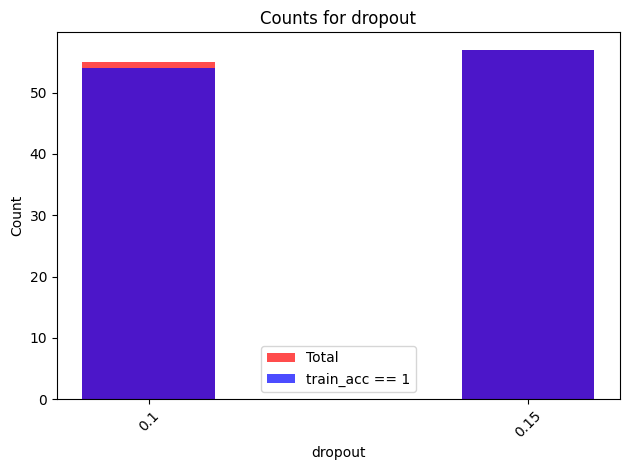

d_model
[24, 46, 42]
[24, 45, 42]


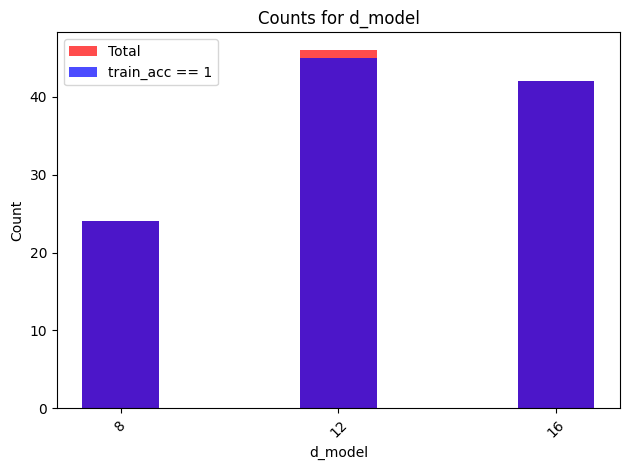

num_encoder_layers
[35, 37, 40]
[34, 37, 40]


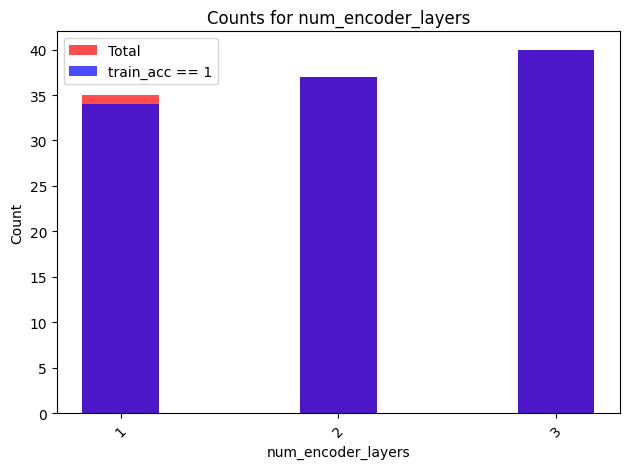

num_decoder_layers
[112]
[111]


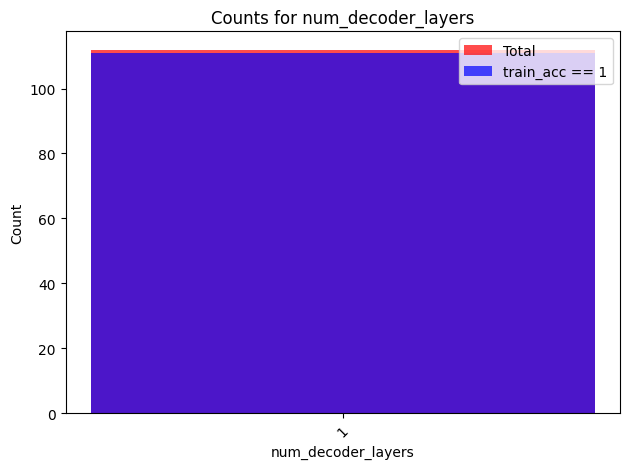

nhead
[60, 52]
[59, 52]


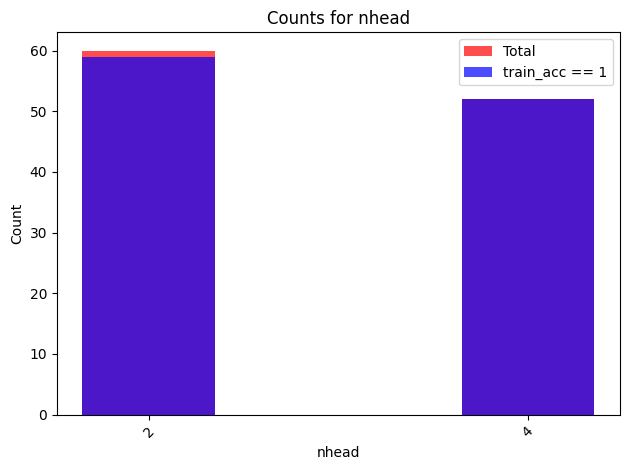

dim_feedforward
[31, 36, 45]
[31, 36, 44]


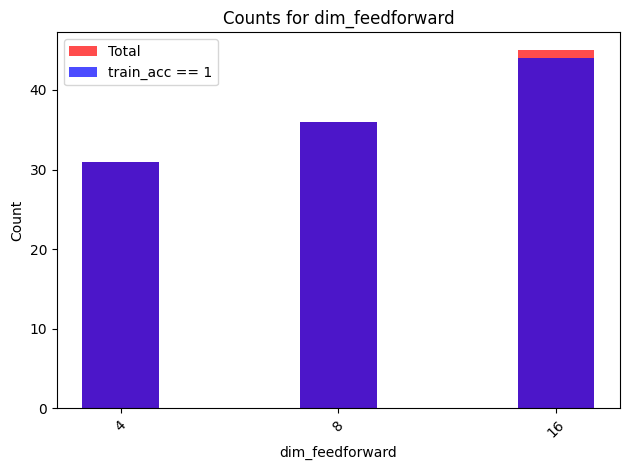

In [37]:
df_steane_trimmed = df_steane[df_steane['num_decoder_layers'] == 1]
print(len(df_steane_trimmed))
print(len(df_steane_trimmed[df_steane_trimmed['train_acc'] == 1]))
plot_hyperparam_bars(df_steane_trimmed)




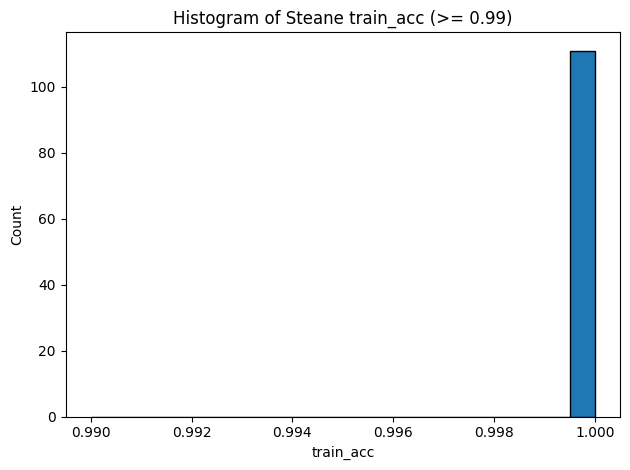

In [38]:
steane_train_acc = df_steane_trimmed['train_acc']
plt.figure()
plt.hist(steane_train_acc[steane_train_acc >= 0.99], bins=20, range=(0.99, 1.0), edgecolor='black')
plt.xlabel('train_acc')
plt.ylabel('Count')
plt.title('Histogram of Steane train_acc (>= 0.99)')
plt.tight_layout()
plt.show()


lr
[15, 9, 9, 11, 10]
[13, 9, 7, 10, 7]


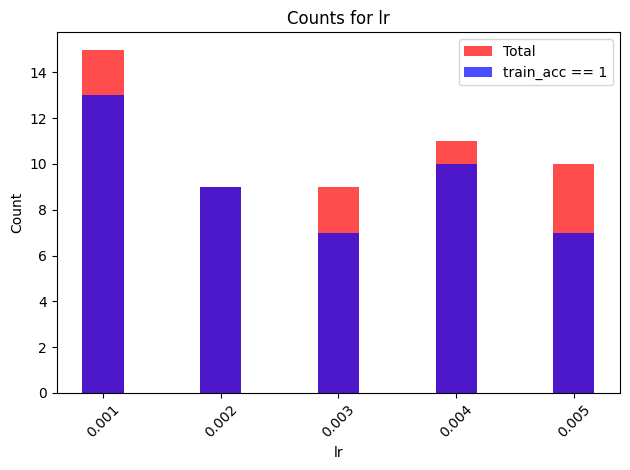

dropout
[25, 29]
[24, 22]


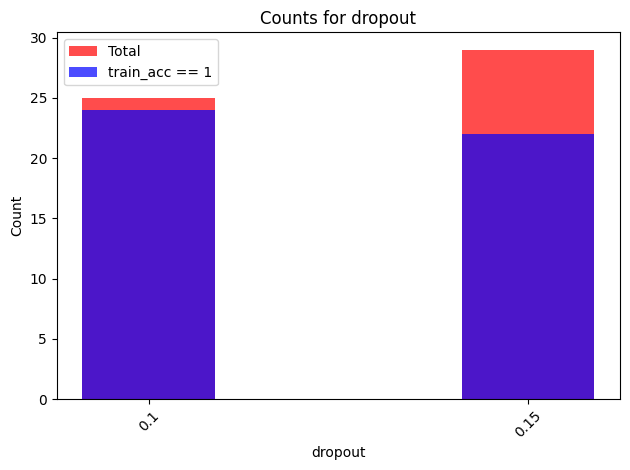

d_model
[21, 17, 16]
[20, 15, 11]


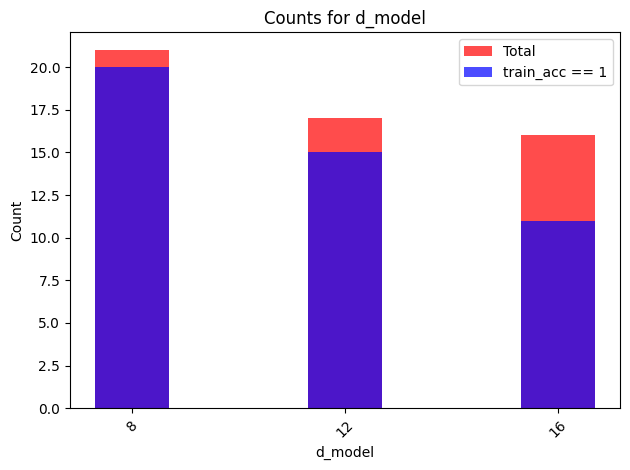

num_encoder_layers
[16, 19, 19]
[11, 16, 19]


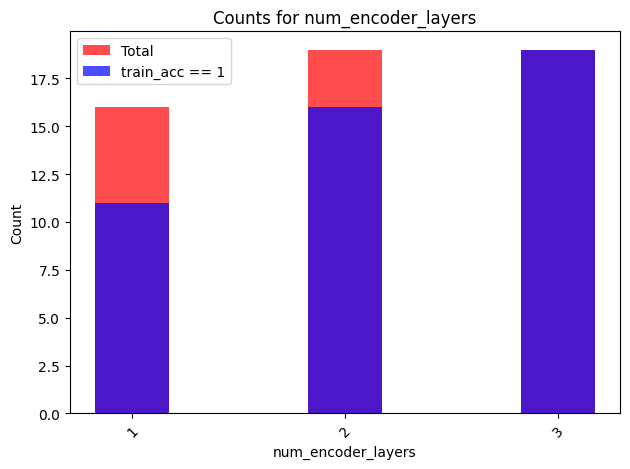

num_decoder_layers
[54]
[46]


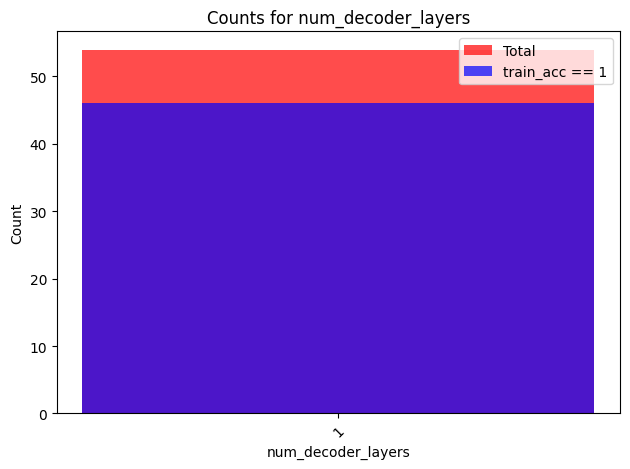

nhead
[31, 23]
[24, 22]


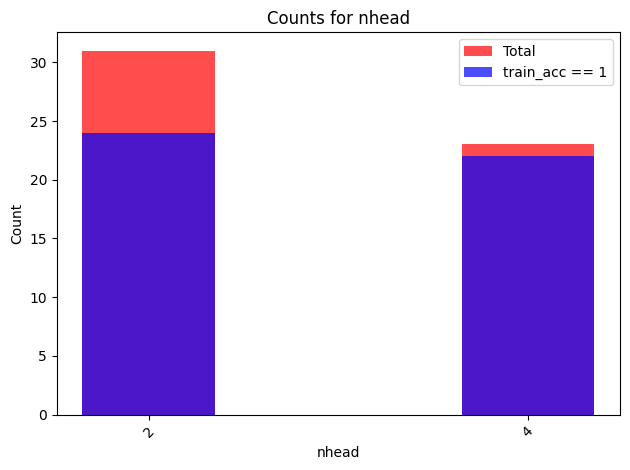

dim_feedforward
[17, 18, 19]
[13, 15, 18]


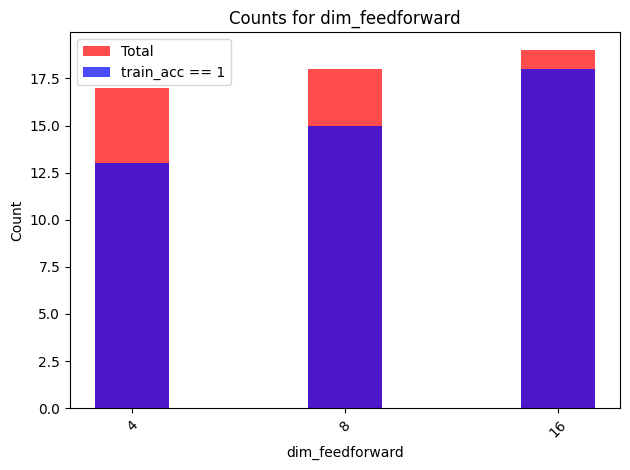

In [40]:
df_toric_code_trimmed = df_toric_code[df_toric_code['num_decoder_layers'] == 1]
df_toric_code_trimmed = df_toric_code_trimmed[df_toric_code_trimmed['lr'] >= 0.001]
plot_hyperparam_bars(df_toric_code_trimmed)
